In [1]:
source('../src/load_data.r')
source('../src/multiplot.r')

In [2]:
dim(housing_df)

[1] 1451   80

In [3]:
head(housing_df)

MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,2,2008,WD,Normal,208500
20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,⋯,0,without,without,without,0,5,2007,WD,Normal,181500
60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,9,2008,WD,Normal,223500
70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,⋯,0,without,without,without,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,⋯,0,without,without,without,0,12,2008,WD,Normal,250000
50,RL,85,14115,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,⋯,0,without,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
count_empty_total()

In [5]:
numeric_features = colnames(Filter(is.numeric, housing_df))
numeric_features

[1] "LotFrontage"   "LotArea"       "YearBuilt"     "YearRemodAdd" 
 [5] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
 [9] "TotalBsmtSF"   "FirstFlrSF"    "SecondFlrSF"   "LowQualFinSF" 
[13] "GrLivArea"     "GarageYrBlt"   "GarageArea"    "WoodDeckSF"   
[17] "OpenPorchSF"   "EnclosedPorch" "ThreeSsnPorch" "ScreenPorch"  
[21] "PoolArea"      "MiscVal"       "YrSold"        "SalePrice"

In [6]:
numeric_df = Filter(is.numeric, housing_df)
numeric_df$SalePrice <- NULL
numeric_features = colnames(numeric_df)

In [7]:
attach(numeric_df)

In [8]:
install.packages('rpart')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
library(caret)
library(rpart)

Loading required package: lattice


## Redundancy

In [10]:
calculate_r_2 <- function(actual, prediction) {
    return (1 - (sum((actual-prediction)^2)/sum((actual-mean(actual))^2)))
}

calculate_r_2_for_feature <- function(data, feature) {
    n <- nrow(data)
    
    train_index <- sample(seq_len(n), size = 0.8*n)

    train <- data[train_index,]
    test <- data[-train_index,]
    
    this_formula = paste(feature,"~.")
    fit <- rpart(data=train, formula=as.formula(this_formula))

    y_test <- as.vector(test[[feature]])
    test[feature] <- NULL
    predictions <- predict(fit, test)
    return (calculate_r_2(y_test, predictions))
}

mean_r2_for_feature <- function (data, feature) {
    scores = c()
    for (i in 1:10) {
        scores = c(scores, calculate_r_2_for_feature(data, feature))
    }
    
    return (mean(scores))
}

In [11]:
calculate_r_2_for_feature(numeric_df,'LotFrontage')

[1] 0.247913

In [12]:
for (feature in numeric_features){
    print(paste(feature, mean_r2_for_feature(numeric_df, feature)))
}

[1] "LotFrontage 0.276489425782845"
[1] "LotArea -0.198017916174412"
[1] "YearBuilt 0.697170718244829"
[1] "YearRemodAdd 0.450914876841008"
[1] "MasVnrArea 0.108102565709508"
[1] "BsmtFinSF1 0.806286897315957"
[1] "BsmtFinSF2 0.47781211749709"
[1] "BsmtUnfSF 0.767538431761551"
[1] "TotalBsmtSF 0.707728306168819"
[1] "FirstFlrSF 0.764146841797679"
[1] "SecondFlrSF 0.853253592059798"
[1] "LowQualFinSF -0.191041328101355"
[1] "GrLivArea 0.856923187395044"
[1] "GarageYrBlt 0.788221404991474"
[1] "GarageArea 0.571368121890171"
[1] "WoodDeckSF 0.0124592323431251"
[1] "OpenPorchSF 0.0353817592894283"
[1] "EnclosedPorch 0.0661390600798617"
[1] "ThreeSsnPorch -0.416606672214886"
[1] "ScreenPorch -0.151042377003429"
[1] "PoolArea -Inf"
[1] "MiscVal -1.1229898313749"
[1] "YrSold 0.0666827476529554"


## Correlation

In [ ]:
options(digits=3)
cor(numeric_df)

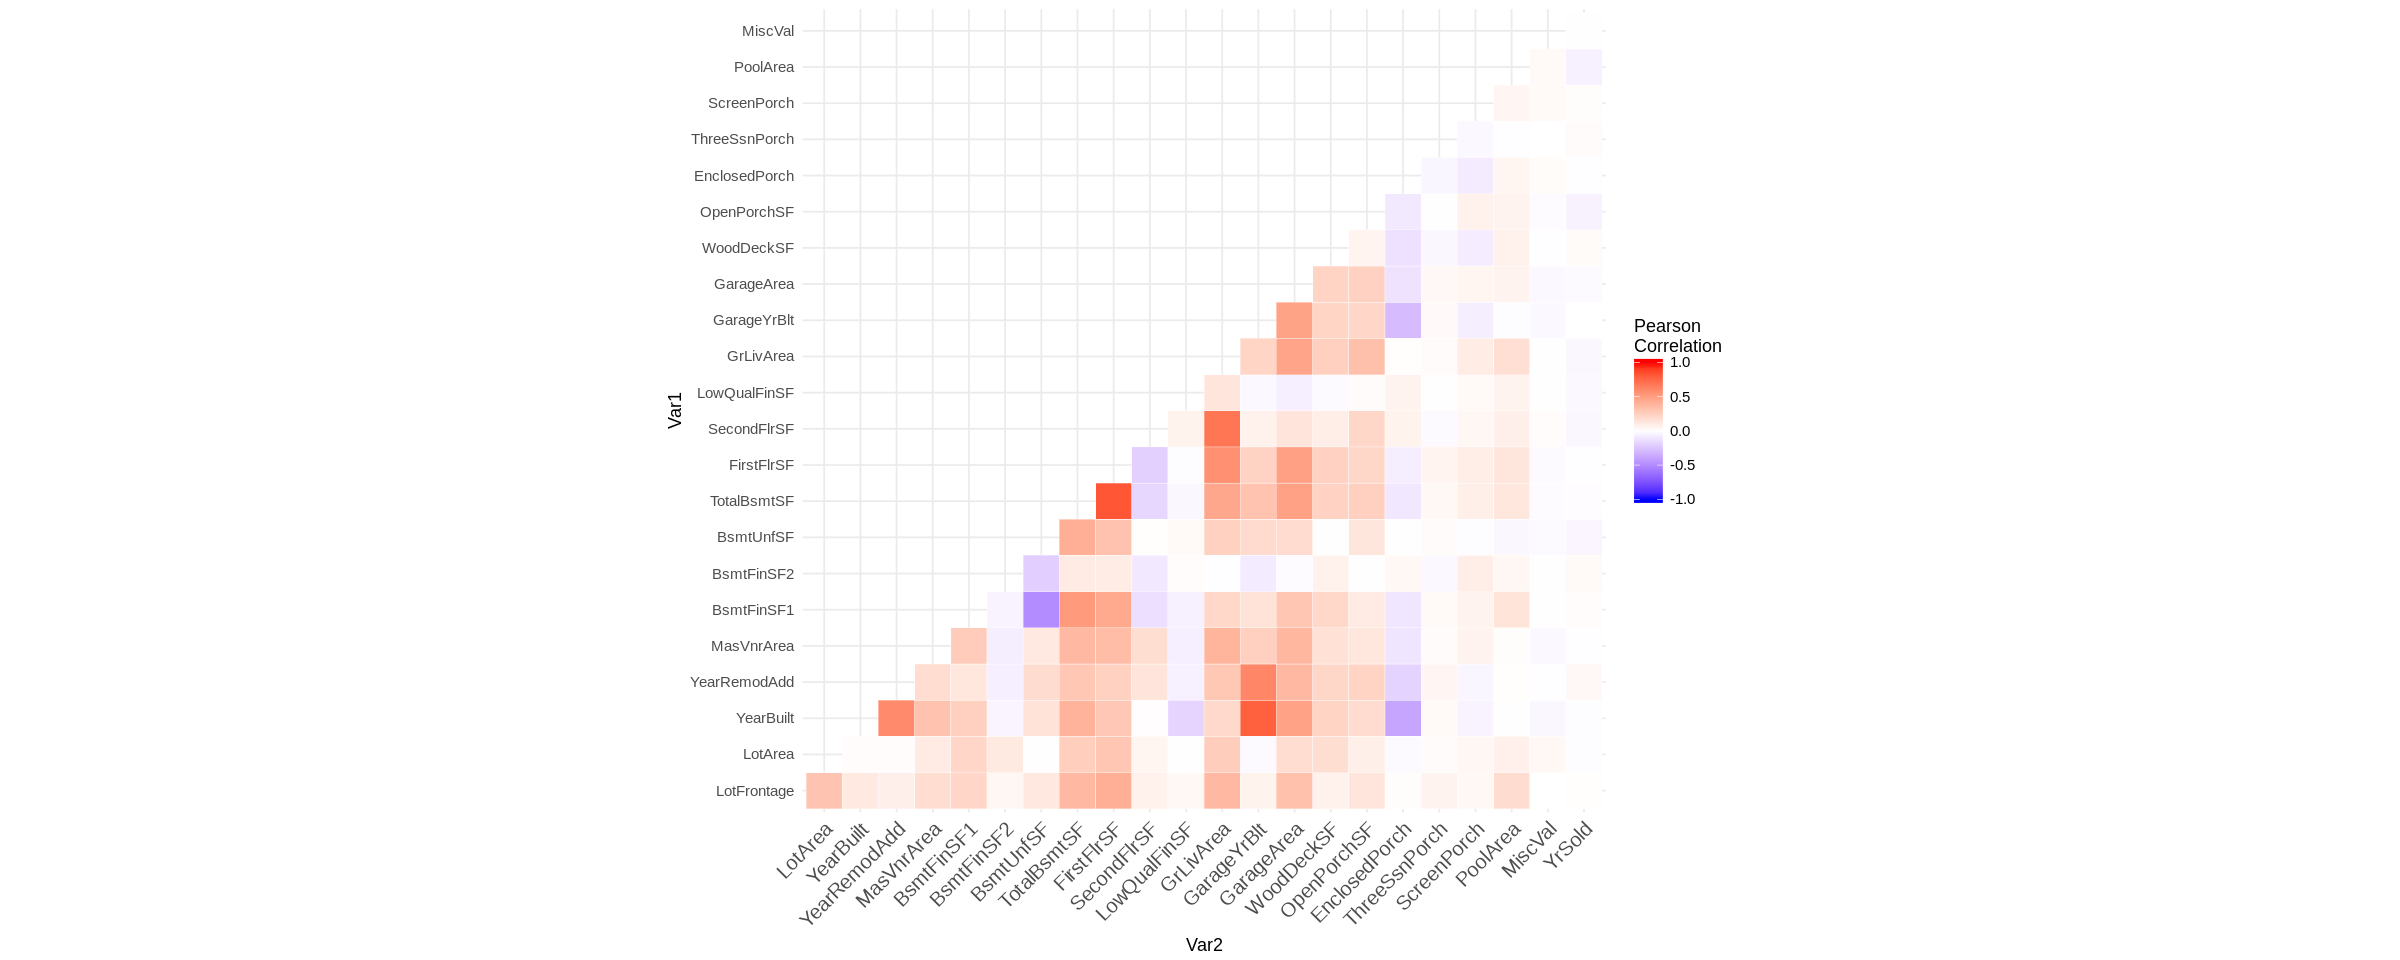

In [13]:
library(reshape2)
cormat = cor(numeric_df)

cormat[lower.tri(cormat)] <- NA
diag(cormat) <- NA

melted_cormat <- melt(cormat, na.rm = T)

library(ggplot2)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()